In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error
from plots_utils import make_scatter_line_plots, make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot, \
                        make_line_plot_v1, make_line_plot_v2, make_scatter_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Assumed irrigation efficiencies
Groundwater Management District 3 - 0.85

Groundwater Management District 4 - 0.85

Republican River Basin - 0.80

Harquahala Irrigation Non-Expansion Area - 0.65

Douglas Active Management Area - 0.65

Diamond Valley - 0.87

Central valley - 0.7

# model version = V14

# Annual pumping vs net GW (in m3) comparison for all basins

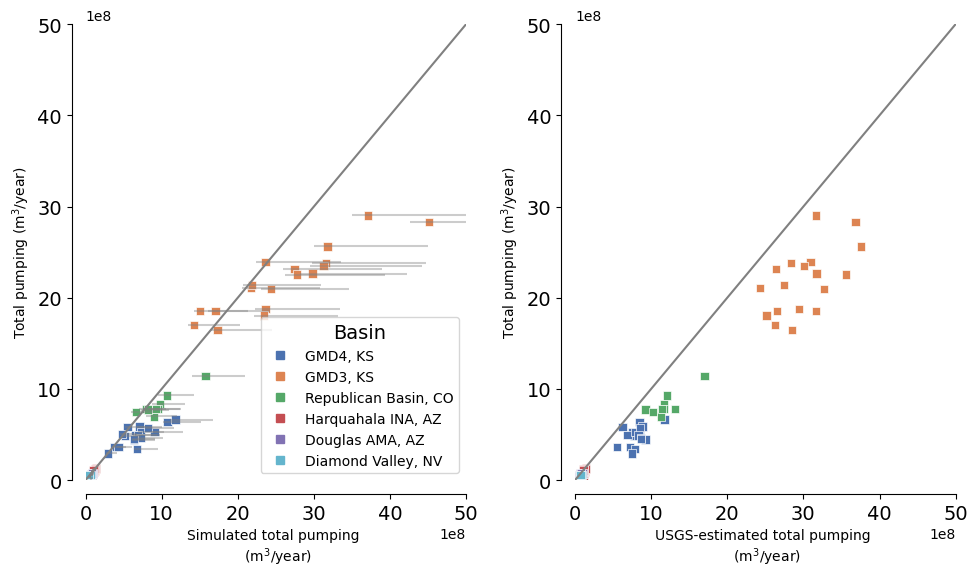

In [4]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')

# filtering steps for RPB, CO data; flow meters installed after 2010
ann_df = ann_df[~((ann_df['basin'] == 'Republican Basin, CO') & (ann_df['year'] < 2010))]

plot_save_path = './plots/all_basins_total_m3_comparison_v2.png'

basin_names = ('GMD4, KS', 'GMD3, KS', 'Republican Basin, CO', 'Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='sim_pumping_m3_dy', y1='pumping_m3', 
                                               error_xmin='sim_pumping_m3_60', error_xmax='sim_pumping_m3_90', hue='basin', 
                                               xlabel1='Simulated total pumping \n (m$^3$/year)', 
                                               ylabel1='Total pumping (m$^3$/year)', 
                                               fontsize=14, lim=(0, 5000000000),
                                               scientific_ticks=True, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='USGS_m3', 
                                               y2='pumping_m3', 
                                               xlabel2='USGS-estimated total pumping \n (m$^3$/year)', 
                                               ylabel2='Total pumping (m$^3$/year)',
                                               legend='on',
                                               figsize=(10, 6), savepath=plot_save_path)

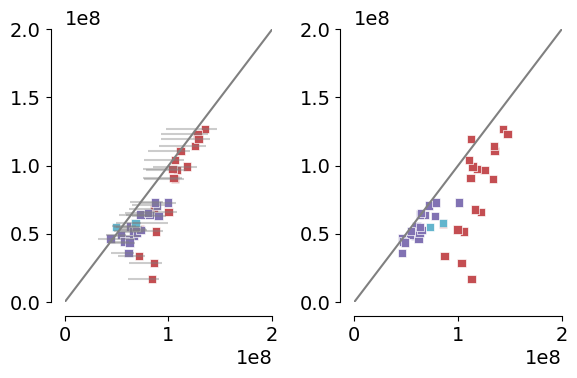

In [5]:
basin_names = ('Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')
ann_df_sel = ann_df[ann_df['basin'].isin(basin_names)] 

plot_save_path = './plots/small_basins_total_m3_comparison_v2.png'

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df_sel, x1='sim_pumping_m3_dy', y1='pumping_m3', 
                                               error_xmin='sim_pumping_m3_60', error_xmax='sim_pumping_m3_90', 
                                               hue='basin', 
                                               xlabel1=None, 
                                               ylabel1=None, 
                                               fontsize=14, lim=(0, 200000000),
                                               scientific_ticks=True, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='USGS_m3', 
                                               y2='pumping_m3', 
                                               xlabel2=None, 
                                               ylabel2=None,
                                               figsize=(6, 4), 
                                               legend='off',
                                               savepath=plot_save_path)

In [6]:
# R2 estiamtion
ann_df = ann_df.dropna()

r2_vl = r2_score(y_true=ann_df['pumping_m3'], y_pred=ann_df['sim_pumping_m3_dy'])
print(f'R2 at volume space = {r2_vl}')

R2 at volume space = 0.727580795277099


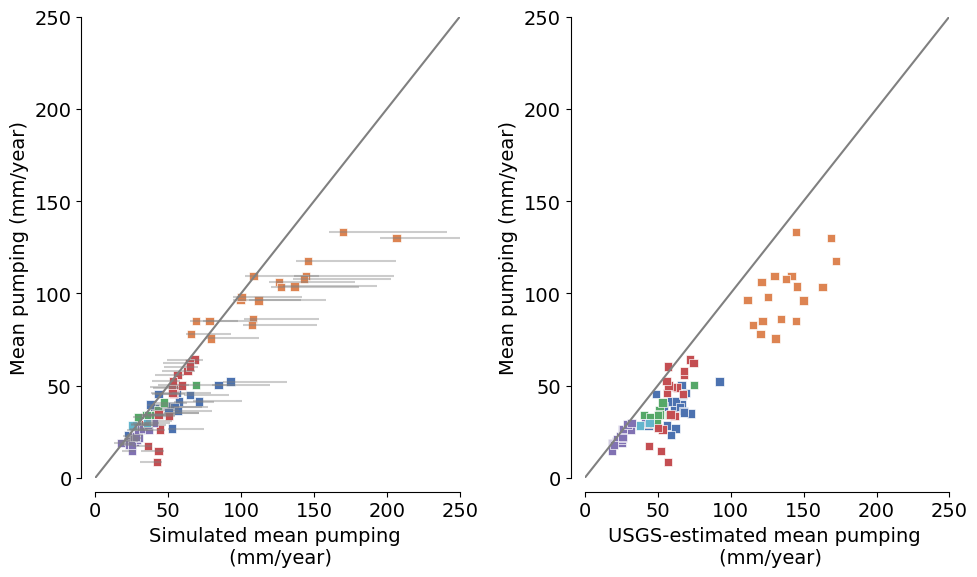

In [7]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')

# filtering steps for RPB, CO data; flow meters installed after 2010
ann_df = ann_df[~((ann_df['basin'] == 'Republican Basin, CO') & (ann_df['year'] < 2010))]

plot_save_path = './plots/all_basins_mean_mm_comparison_v2.png'

basin_names = ('GMD4, KS', 'GMD3, KS', 'Republican Basin, CO', 'Harquahala INA, AZ', 'Douglas AMA, AZ', 'Diamond Valley, NV')

make_BOI_netGW_vs_pumping_vs_USGS_scatter_plot(df=ann_df, x1='sim_mean_pumping_mm_dy', y1='mean pumping_mm', 
                                               error_xmin='sim_mean_pumping_mm_60', error_xmax='sim_mean_pumping_mm_90', 
                                               hue='basin', 
                                               xlabel1='Simulated mean pumping \n (mm/year)', 
                                               ylabel1='Mean pumping (mm/year)', 
                                               fontsize=14, lim=(0, 250),
                                               scientific_ticks=False, scilimits=(8, 8),
                                               basin_labels=basin_names,
                                               x2='mean USGS_mm', 
                                               y2='mean pumping_mm', 
                                               xlabel2='USGS-estimated mean pumping \n (mm/year)', 
                                               ylabel2='Mean pumping (mm/year)',
                                               legend='off',
                                               figsize=(10, 6), savepath=plot_save_path)

In [8]:
# R2 estiamtion
ann_df = ann_df.dropna()

r2_dp = r2_score(y_true=ann_df['mean pumping_mm'], y_pred=ann_df['sim_mean_pumping_mm_dy'])
print(f'R2 at depth space = {r2_dp}')

R2 at depth space = 0.5528477513880654


------------

# GMD4, Kansas

In [9]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'GMD4, KS']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

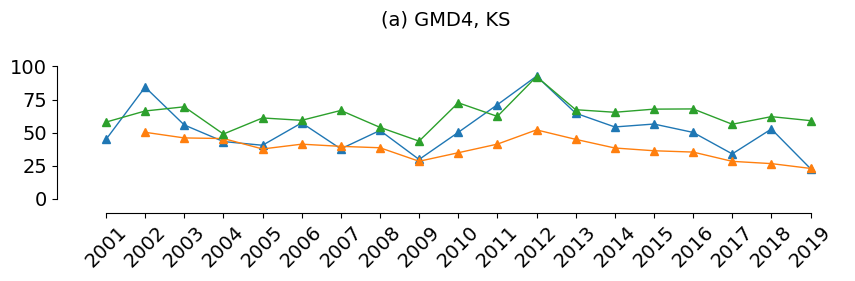

In [10]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]
savepath = 'plots/GMD4_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(a) GMD4, KS',
                  figsize=(10, 3), y_lim=(0, 120), 
                  legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

-------------------

# GMD3, Kansas

In [11]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'GMD3, KS']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

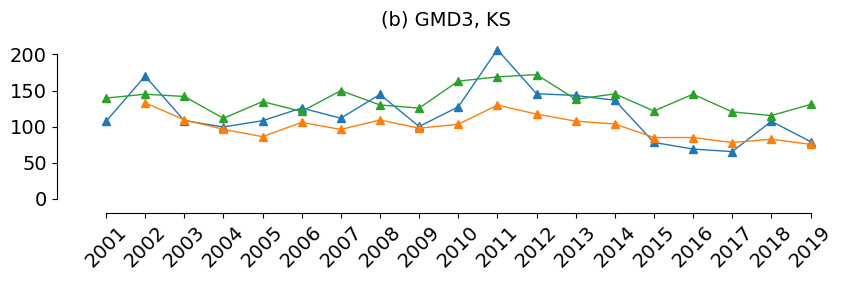

In [12]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


savepath = 'plots/GMD3_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(b) GMD3, KS', y_lim=(0, 220), 
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

---------

# RPB, Colorado

In [13]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Republican Basin, CO']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

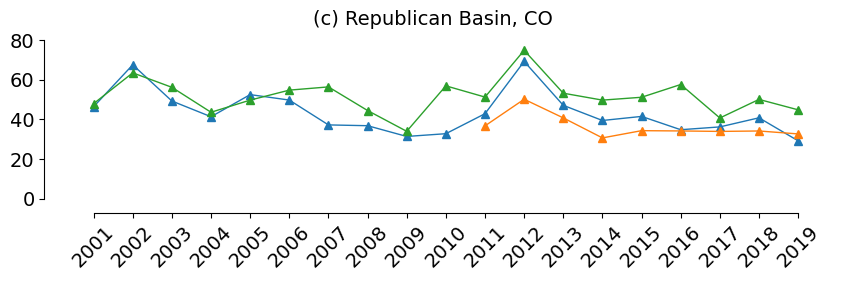

In [14]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


savepath = 'plots/RPB_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(c) Republican Basin, CO', y_lim=(0, 80), 
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

________________

# Harquahala INA, Arizona

In [15]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Harquahala INA, AZ']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

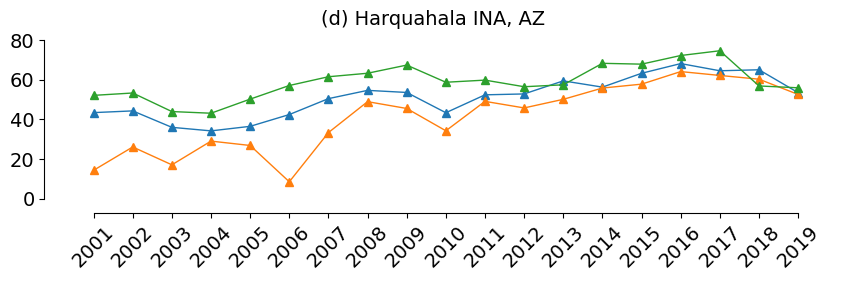

In [16]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


savepath = 'plots/HQR_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(d) Harquahala INA, AZ', y_lim=(0, 80), 
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

------------------

# Douglas AMA, Arizona

In [17]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Douglas AMA, AZ']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

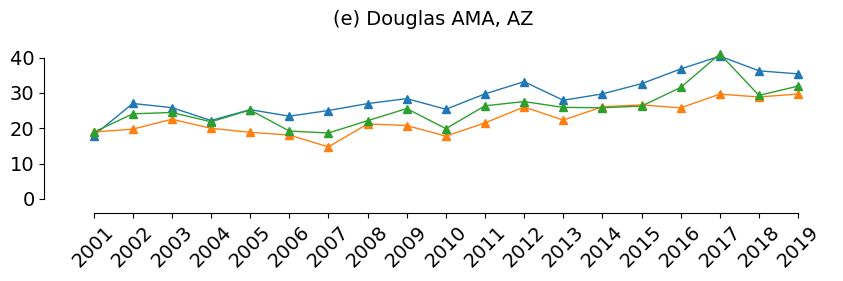

In [18]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


savepath = 'plots/Doug_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(e) Douglas AMA, AZ', y_lim=(0, 45), 
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

----------

# Diamod Valley, Nevada

In [19]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/annual_all_basins.csv')
ann_df_sel = ann_df[ann_df['basin'] == 'Diamond Valley, NV']
ann_df_sel.loc[ann_df_sel['mean pumping_mm'] < 1, 'mean pumping_mm'] = np.nan

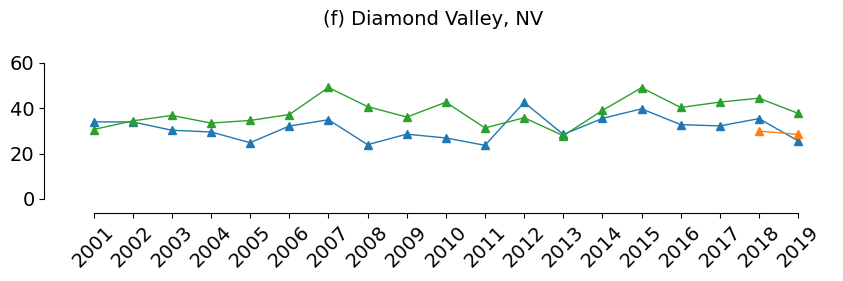

In [20]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


savepath = 'plots/DV_timeseries.png'

make_line_plot_v2(y1=ann_df_sel['sim_mean_pumping_mm_dy'], y2=ann_df_sel['mean pumping_mm'], y3=ann_df_sel['mean USGS_mm'], year=year, fontsize=14, 
                  xlabel=None, ylabel=None, 
                  line_label_1='Model estimated pumping', line_label_2='Actual pumping', line_label_3='USGS estimated pumping', 
                  suptitle='(f) Diamond Valley, NV', y_lim=(0, 70), 
                  figsize=(10, 3), legend_pos='upper left', legend='off', savepath= savepath, no_xticks=False)

--------------

## Central Valley, CA

In [21]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/cv/cv_annual.csv')
ann_df.columns

Index(['year', 'netGW_mm', 'netGW_AF', 'USGS_AF', 'netGW_m3', 'USGS_m3',
       'mean netGW_mm', 'mean USGS_mm', 'sim_pumping_m3',
       'sim_mean_pumping_mm'],
      dtype='object')

In [22]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


In [23]:
# merging CVHM and C2VSIM pumping estimates to the dataframe
cvhm_df = pd.read_csv('../../Data_main/Pumping/California/CVHM2/CVHM2_pumping_annual.csv')
c2vsim_df = pd.read_csv('../../Data_main/Pumping/California/C2VSIM/C2VISM_ag_pumping_annual.csv')

cvhm_df = cvhm_df[['year', 'mean CVHM_mm']]
cvhm_df = cvhm_df[cvhm_df['year'].isin(year)]
c2vsim_df = c2vsim_df[['year', 'mean C2VSIM_mm']]
c2vsim_df = c2vsim_df[c2vsim_df['year'].isin(year)]

merged_df = ann_df.merge(cvhm_df, on='year',  how='outer')
merged_df = merged_df.merge(c2vsim_df, on='year', how='outer')
# merged_df.head()

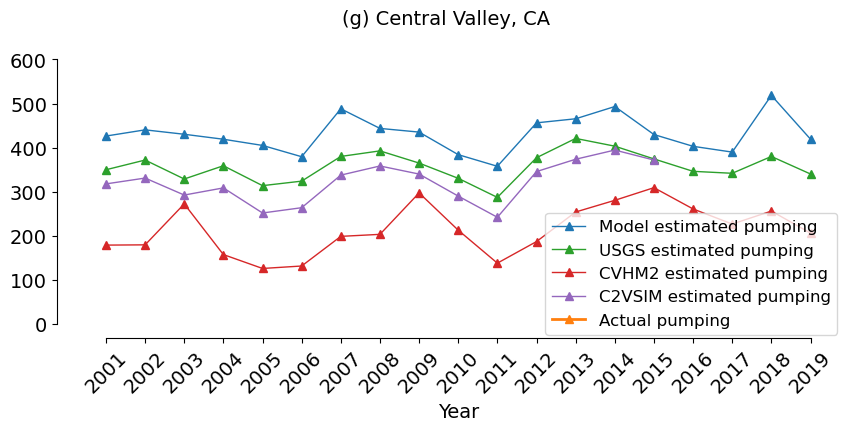

In [24]:
year = [
             # 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             # 2020
             ]


fig, ax = plt.subplots(figsize=(10, 5))
fontsize = 14
plt.rcParams['font.size'] = fontsize

line1, = ax.plot(merged_df['year'], merged_df['sim_mean_pumping_mm'], label='Model estimated pumping', color='tab:blue', marker='^', linewidth=1)
line2, = ax.plot(merged_df['year'], merged_df['mean USGS_mm'], label='USGS estimated pumping', color='tab:green', marker='^', linewidth=1)
line3, = ax.plot(merged_df['year'], merged_df['mean CVHM_mm'], label='CVHM2 estimated pumping', color='tab:red', marker='^', linewidth=1)
line4, = ax.plot(merged_df['year'], merged_df['mean C2VSIM_mm'], label='C2VSIM estimated pumping', color='tab:purple', marker='^', linewidth=1)

ax.set_xticks(year)
ax.set_xlabel('Year')
ax.set_ylim((0, 600))

# Define the additional legend elements
additional_legend_labels = ['Actual pumping']
additional_legend_lines = [plt.Line2D([0], [0], color='tab:orange', lw=2, marker='^')]

# Combine the original and additional legend elements
combined_lines = [line1, line2, line3, line4] + additional_legend_lines
combined_labels = ['Model estimated pumping', 'USGS estimated pumping', 
                   'CVHM2 estimated pumping', 'C2VSIM estimated pumping'] + additional_legend_labels

# Create the combined legend
ax.legend(combined_lines, combined_labels, loc='lower right', bbox_to_anchor=(1, -0.07),
          fontsize=(fontsize-2))

# remove bounding box
sns.despine(offset=10, trim=True)  # turning of bounding box around the plots

# xticks
ax.set_xticklabels(labels=year, rotation=45, fontsize=fontsize)

# suptitle
fig.suptitle('(g) Central Valley, CA', fontsize=fontsize)

plt.subplots_adjust(bottom=0.35)

fig.savefig('plots/CA_timeseries.png', dpi=300, transparent=True)

## CVHM2 vs C2VSim pumping compariosn

In [26]:
years = list(range(1986, 2016))

# loading CVHM2 data 
cvhm_df = pd.read_csv('../../Data_main/Pumping/California/CVHM2/CVHM2_pumping_annual.csv')
cvhm_df = cvhm_df[cvhm_df['year'].isin(years)]

# loading C2VSim data 
c2vsim_df = pd.read_csv('../../Data_main/Pumping/California/C2VSIM/C2VISM_ag_pumping_annual.csv')
c2vsim_df = c2vsim_df[c2vsim_df['year'].isin(years)]

(0.0, 24000000000.0)

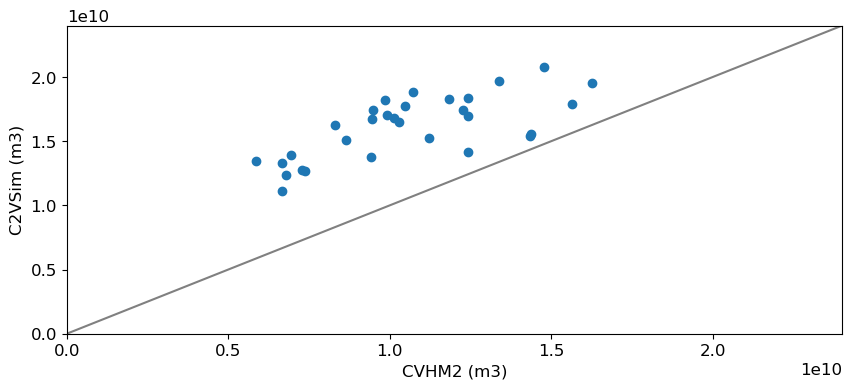

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.rcParams['font.size'] = 12

# scatter plot (pixel-wise mm/year)
ax.scatter(x=cvhm_df['pumping (m3/year)'], y=c2vsim_df['pumping (m3/year)'])
ax.set_ylabel('C2VSim (m3)')
ax.set_xlabel('CVHM2 (m3)')
ax.plot([0, 1], [0, 1], 'gray', transform=ax.transAxes)
ax.set_xlim((0, 24000000000))
ax.set_ylim((0, 24000000000))

------------

## Snake River Basin, ID

In [26]:
ann_df = pd.read_csv('../../Data_main/results_eval/netGW/srb/srb_annual.csv')

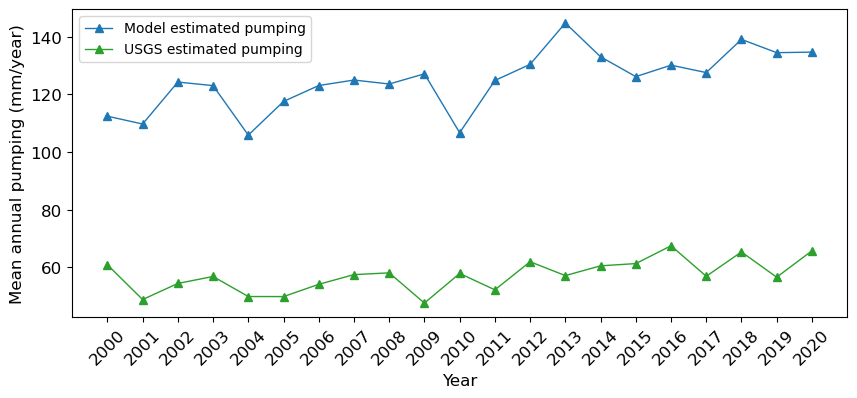

In [27]:
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

make_line_plot_v1(y1=ann_df['sim_mean_pumping_mm'], y2=ann_df['mean USGS_mm'], year=year, fontsize=12, 
                  xlabel='Year', ylabel='Mean annual pumping (mm/year)', 
                  line_label_1='Model estimated pumping', line_label_2='USGS estimated pumping', 
                  figsize=(10, 4), legend_pos='upper left')